In [2]:
import pandas as pd
file_path = "C:\\Users\\prajn\\Downloads\\forestfires.csv"
df = pd.read_csv(file_path)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


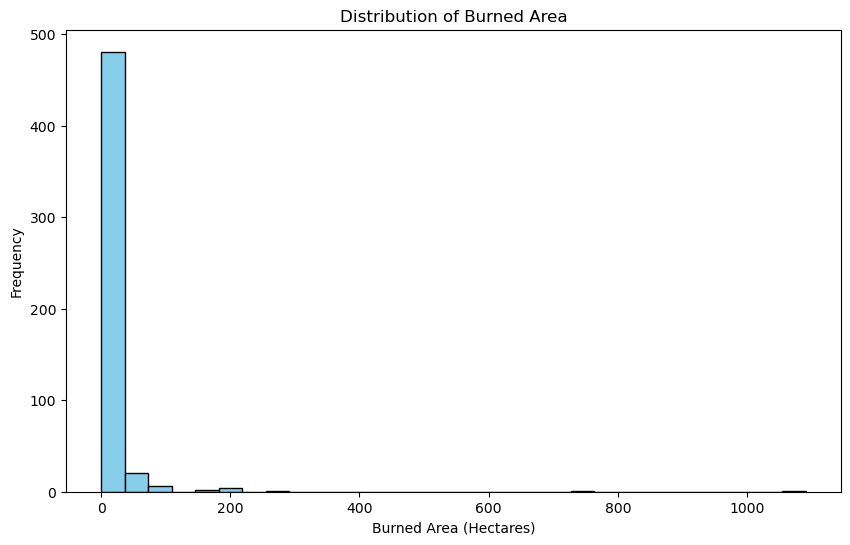

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['area'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Burned Area")
plt.xlabel("Burned Area (Hectares)")
plt.ylabel("Frequency")
plt.show()

In [12]:
import seaborn as sns

C:\Users\prajn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


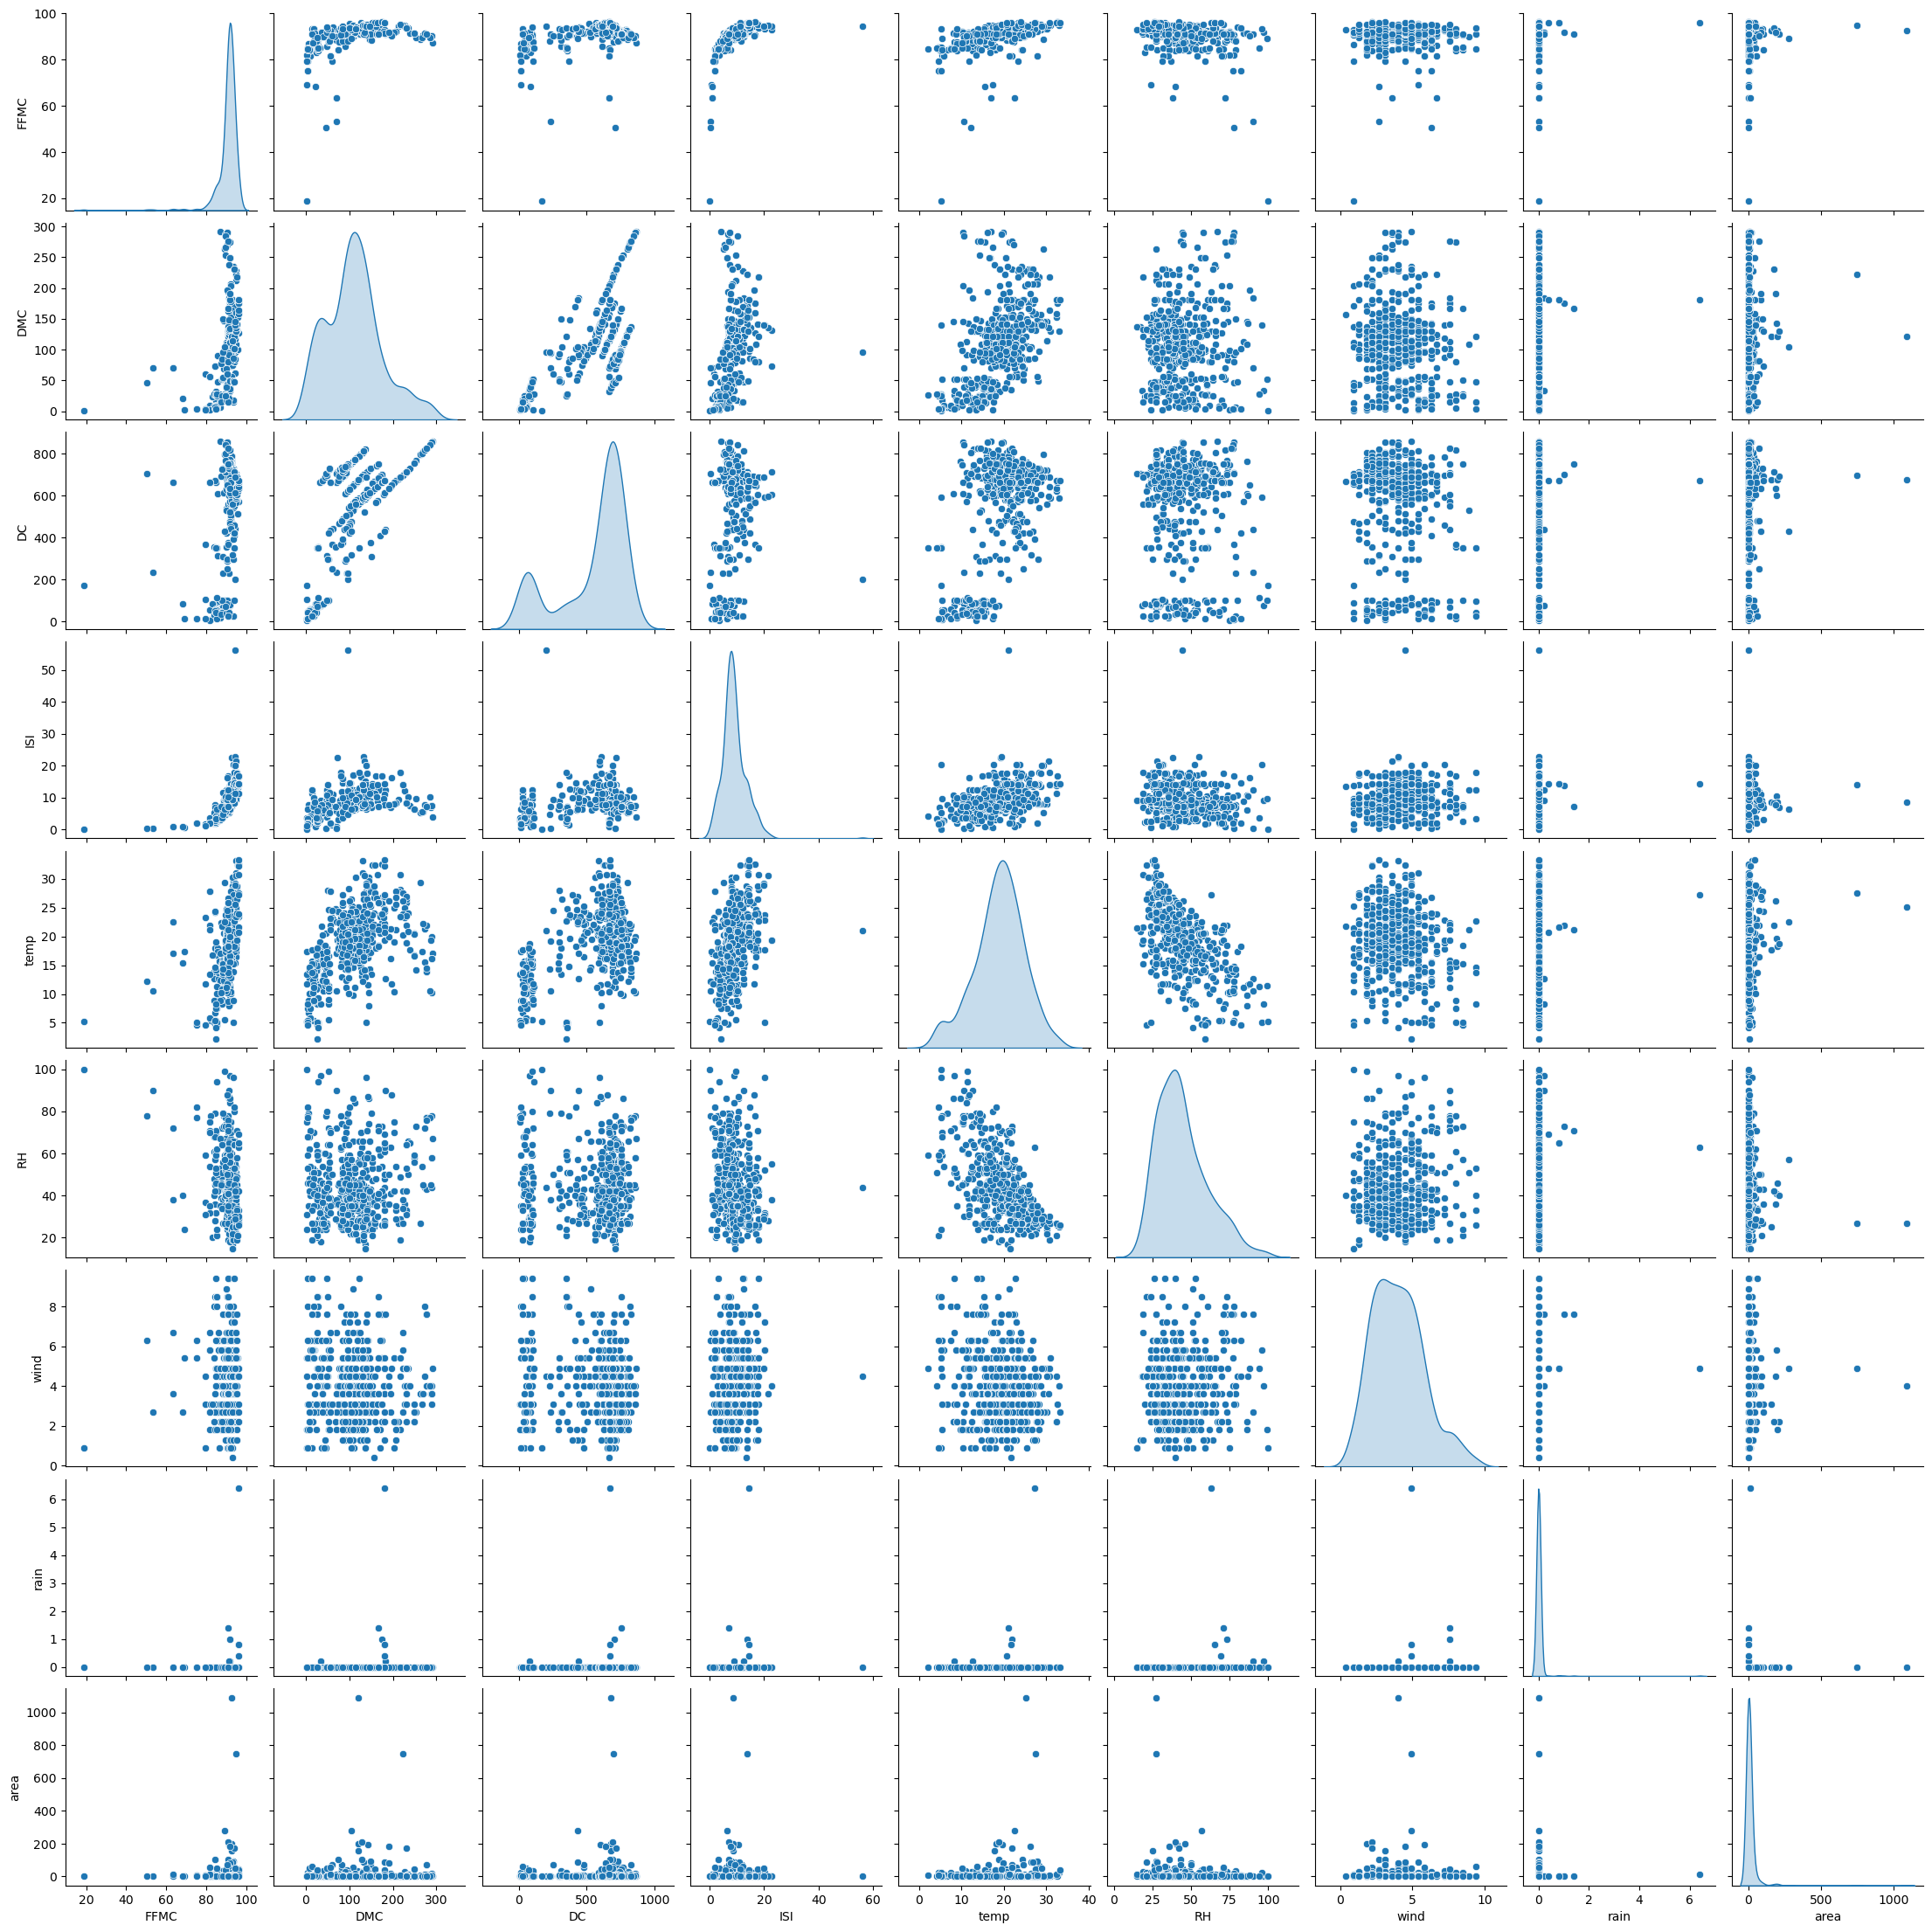

In [26]:
sns.pairplot(data=df[['FFMC', 'DMC', 'DC','ISI','temp','RH','wind','rain','area']], diag_kind='kde')
plt.show()

In [ ]:
df = pd.get_dummies(df, columns=['month'], drop_first=True)
df = pd.get_dummies(df, columns=['day'], drop_first=True)

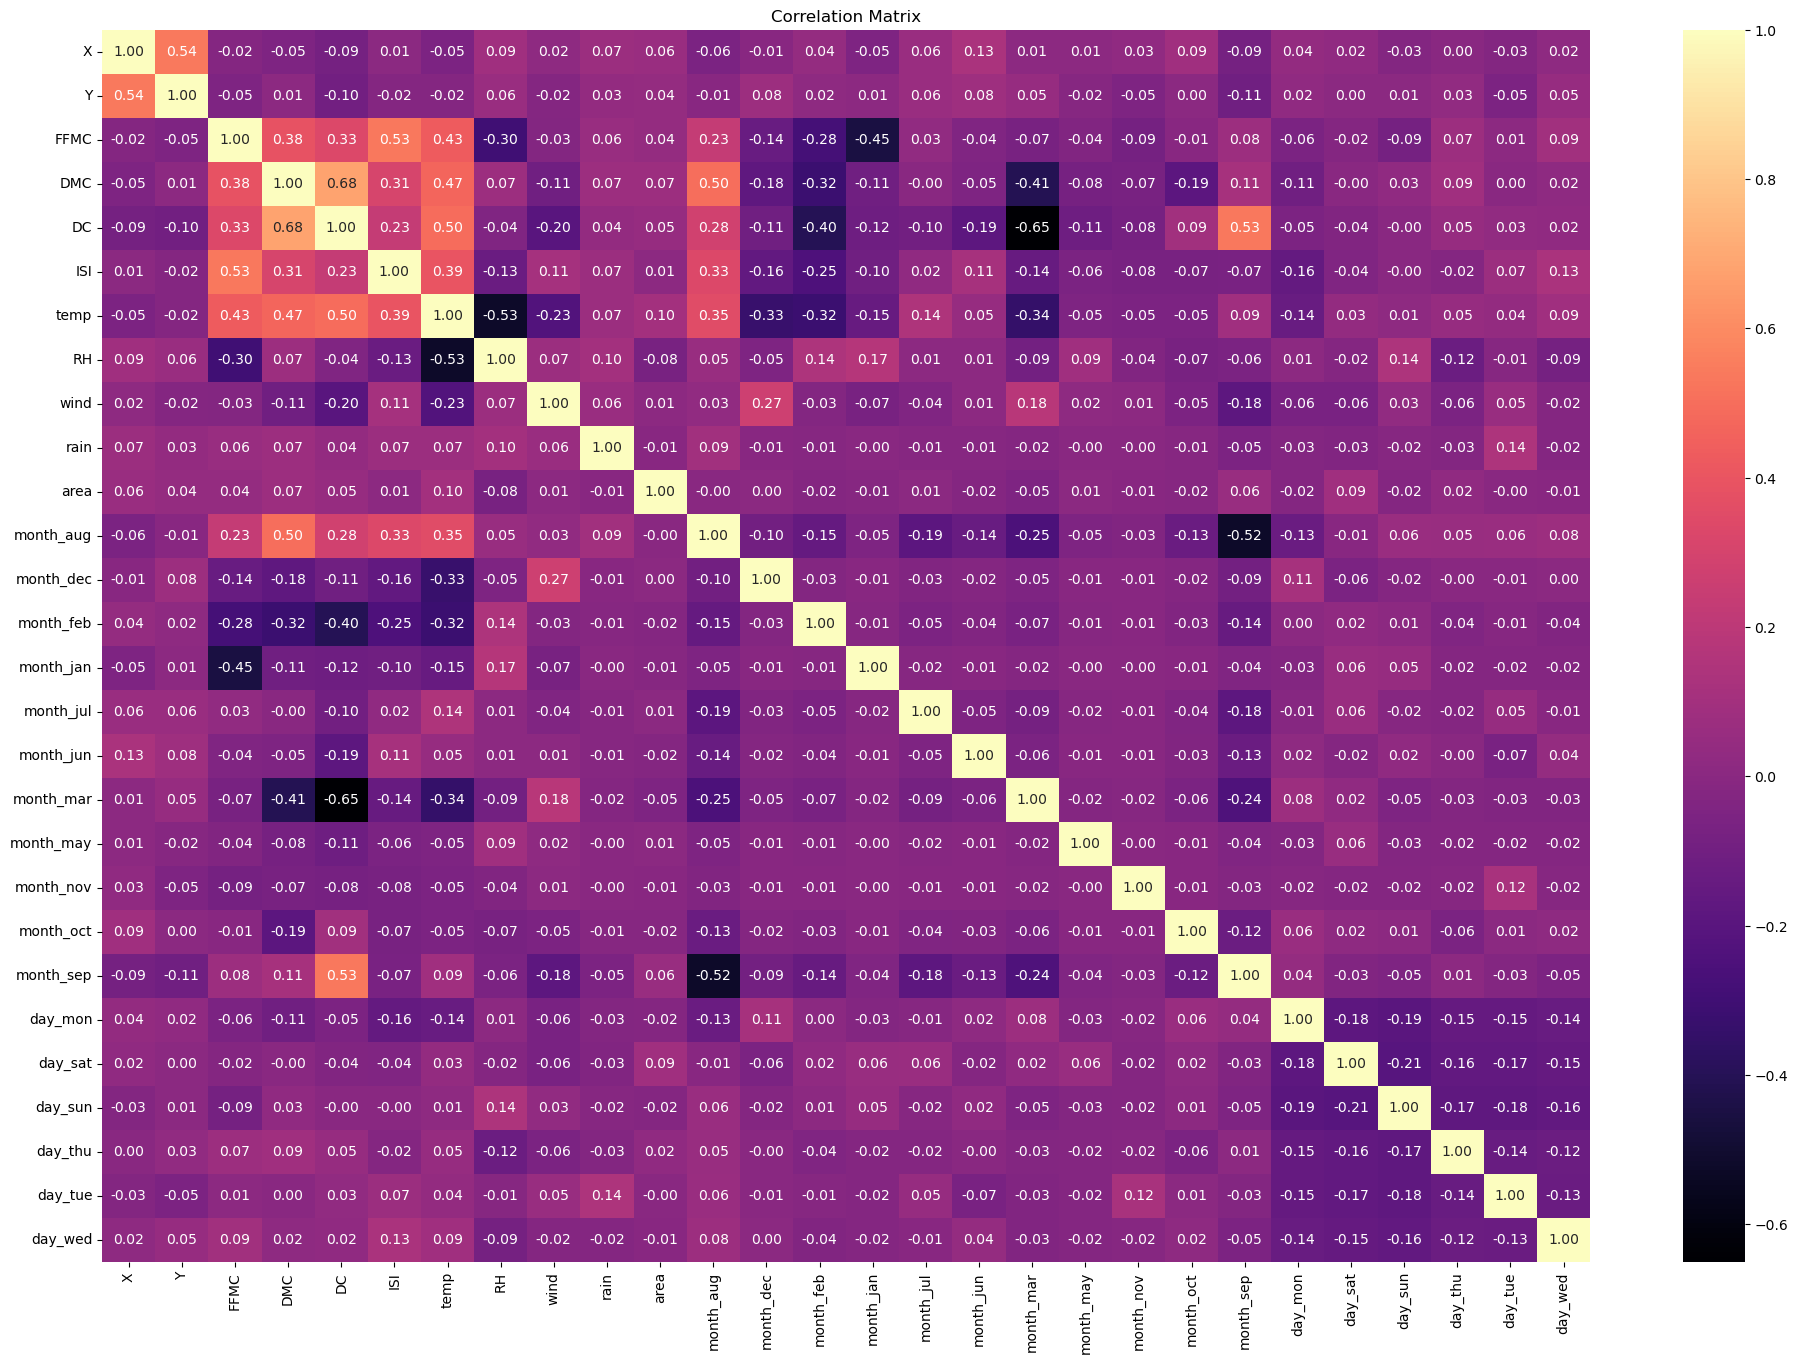

In [53]:
correlation_matrix = df.corr()

plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [27]:
df.isnull().any()

X            False
Y            False
FFMC         False
DMC          False
DC           False
ISI          False
temp         False
RH           False
wind         False
rain         False
area         False
month_aug    False
month_dec    False
month_feb    False
month_jan    False
month_jul    False
month_jun    False
month_mar    False
month_may    False
month_nov    False
month_oct    False
month_sep    False
day_mon      False
day_sat      False
day_sun      False
day_thu      False
day_tue      False
day_wed      False
dtype: bool

In [39]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["area"]) 
y = df["area"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("Training set - X:", X_train.shape, "y:", y_train.shape)
print("Testing set - X:", X_test.shape, "y:", y_test.shape)


Training set - X: (413, 27) y: (413,)
Testing set - X: (104, 27) y: (104,)


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import sklearn as sk
import numpy as np

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

print('\nMean Absolute Error(MAE):', sk.metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE):', np.sqrt(sk.metrics.mean_squared_error(y_test, y_pred)))
print("Coefficient of determination(R^2 Score): %.2f" % sk.metrics.r2_score(y_test, y_pred))

Mean Squared Error: 11613.674532130444
R-squared (R2) Score: 0.014768502010551687

Mean Absolute Error(MAE): 24.52669223665316
Root Mean Squared Error(RMSE): 107.76675986653048
Coefficient of determination(R^2 Score): 0.01


In [58]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree - Mean Squared Error: {mse_tree}")
print(f"Decision Tree - R-squared (R2) Score: {r2_tree}")

print('\nMean Absolute Error(MAE):', sk.metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE):', np.sqrt(sk.metrics.mean_squared_error(y_test, y_pred)))
print("Coefficient of determination(R^2 Score): %.2f" % sk.metrics.r2_score(y_test, y_pred))

Decision Tree - Mean Squared Error: 13858.698512499996
Decision Tree - R-squared (R2) Score: -0.17568528874123523

Mean Absolute Error(MAE): 24.52669223665316
Root Mean Squared Error(RMSE): 107.76675986653048
Coefficient of determination(R^2 Score): 0.01


The Linear Regression model achieved a lower MSE (11613.67) compared to the Decision Tree Regressor (13858.70). This suggests that the Linear Regression model performed better in terms of minimizing the squared differences between predicted and actual values. Lower MSE indicates a better fit to the data. The Linear Regression model had a positive R2 score (0.0148), indicating that it could explain a very small portion of the variance in the target variable. On the other hand, the Decision Tree Regressor had a negative R2 score (-0.1757), suggesting it performed even worse at explaining the variance.

The Linear Regression model is a simple linear model that assumes a linear relationship between the features and the target variable. It struggles when dealing with non-linear relationships, as indicated by the low R2 score.
The Decision Tree Regressor, while capable of capturing non-linear relationships, can easily overfit the data. This is evident from the negative R2 score, indicating poor generalization.

The dataset contains various features related to forest fires, such as temperature, humidity, wind, and the month of occurrence.

The target variable, "area," is highly skewed and does not follow a normal distribution. This suggests that the data might be challenging to model using linear regression.

The correlation matrix revealed that some features had weak or no correlation with the target variable, while others showed stronger correlations. This information guided our choice of features for modeling.

According to the data, that the position influences the probability of fire occurrence. as the DMC value increases, DC also tends to increase, and viceversa. FFMC and ISI are also linearly positively correlated,since they both relate to the velocity at which fire spreads.

The target variable, "area," exhibited a highly skewed distribution, which is challenging for linear models to handle effectively. This may require more advanced regression techniques or data transformations. The dataset contained several features, some of which had weak correlations with the target variable. Both the linear regression model and the decision tree regressor may not be suitable for capturing the complex, non-linear relationships present in the data.

In conclusion, the performance of both models was suboptimal

Assignment 2: Text Classification using Naïve Bayes

In [5]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [6]:
newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

In [7]:
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

preprocessed_data = [preprocess_text(text) for text in newsgroups_data.data]

In [8]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(preprocessed_data)

In [9]:
nb_classifier = MultinomialNB()
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, newsgroups_data.target, test_size=0.3, random_state=42)

nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.67
Precision: 0.70
Recall: 0.67
F1 Score: 0.67
Confusion Matrix:
[[105   2   1   0   0   1   0   2  13   2   2   4   2   4   5  61  11  15
    4   2]
 [  3 181  19  15   4  20   6   3  14   0   0   4   6   2   3   4   0   2
    1   0]
 [  1  20 188  33   6  10   5   2  15   0   1   2   4   0   0   2   0   1
    0   0]
 [  0  17  25 191  15   5  10   4   3   0   0   1   9   2   1   1   1   0
    0   0]
 [  1  13  21  46 173   3  11   4  20   1   0   3  10   1   2   3   0   0
    0   0]
 [  0  36  18   5   0 231   2   0   7   2   0   0   0   0   1   5   1   0
    0   0]
 [  0   5   2  29   9   2 188   7  11   5   0   2   7   0   4   2   2   0
    1   0]
 [  2   4   0   1   1   2   6 207  45   2   2   1   8   4   3   3   8   2
    3   0]
 [  0   5   1   2   2   2   7  16 210   7   3   2   7   2   4   3   3   3
    0   0]
 [  0   2   1   0   0   0   2   2  19 247  14   1   0   2   3   7   2   4
    2   0]
 [  0   1   0   0   0   3   0   2  14   5 274   2   0   1   1   6   0   0

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
count_vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_count = count_vectorizer.fit_transform(newsgroups_data.data)

In [18]:
X_train_count, X_test_count, y_train, y_test = train_test_split(X_count, newsgroups_data.target, test_size=0.3, random_state=42)
nb_classifier_count = MultinomialNB()
nb_classifier_count.fit(X_train_count, y_train)


MultinomialNB()

In [19]:
y_pred_count = nb_classifier_count.predict(X_test_count)
accuracy_count = accuracy_score(y_test, y_pred_count)
precision_count = precision_score(y_test, y_pred_count, average='weighted')
recall_count = recall_score(y_test, y_pred_count, average='weighted')
f1_count = f1_score(y_test, y_pred_count, average='weighted')

print("Metrics with Count Vectorization:")
print(f"Accuracy: {accuracy_count:.2f}")
print(f"Precision: {precision_count:.2f}")
print(f"Recall: {recall_count:.2f}")
print(f"F1 Score: {f1_count:.2f}")

Metrics with Count Vectorization:
Accuracy: 0.64
Precision: 0.67
Recall: 0.64
F1 Score: 0.63


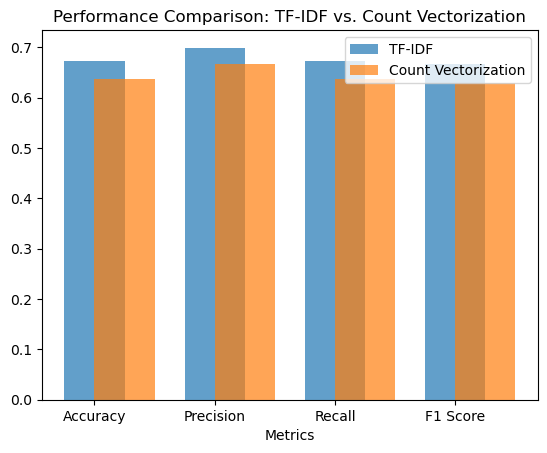

In [24]:
import matplotlib.pyplot as plt

labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
tfidf_metrics = [accuracy, precision, recall, f1]
count_metrics = [accuracy_count, precision_count, recall_count, f1_count]
x = range(len(labels))

plt.bar(x, tfidf_metrics, width=0.5, label='TF-IDF', align='center', alpha=0.7)
plt.bar(x, count_metrics, width=0.5, label='Count Vectorization', align='edge', alpha=0.7)

plt.xlabel('Metrics')
plt.xticks(x, labels)
plt.title('Performance Comparison: TF-IDF vs. Count Vectorization')
plt.legend(loc='best')
plt.show()

This report outlines the preprocessing steps, model performance, and findings from an experiment on text classification using the 20 Newsgroups dataset. We explored two variations of preprocessing, TF-IDF vectorization, and Count Vectorization, and compared their impact on model performance.

Data Preprocessing:

The 20 Newsgroups dataset was loaded, and certain parts of the text were removed (headers, footers, and quotes) for better content focus.
Text data was preprocessed with the following steps:
Conversion to lowercase.
Removal of punctuation.
Elimination of common stopwords.
Vectorization:

Two vectorization techniques were employed:
TF-IDF Vectorization: This method assigns weights to terms in documents based on their importance, helping to highlight unique terms in each document.
Count Vectorization: A simpler method that counts the frequency of terms in documents without weighting.

Model Performance

We used a Naïve Bayes classifier to classify newsgroup documents into their respective categories. The dataset was split into training (70%) and testing (30%) sets for both preprocessing variations. Here are the performance metrics for the two preprocessing techniques:

TF-IDF Metrics:

Accuracy: 0.67
Precision: 0.70
Recall: 0.67
F1 Score: 0.67
Count Vectorization Metrics:

Accuracy: 0.64
Precision: 0.67
Recall: 0.64
F1 Score: 0.63
Findings from the Experiment

TF-IDF Vectorization yielded slightly better performance across all metrics compared to Count Vectorization.
Accuracy, precision, and recall were all higher for the TF-IDF preprocessing approach.
Count Vectorization, while simpler, resulted in slightly lower model performance.

In this experiment, TF-IDF's ability to assign weights to terms based on their importance in documents appears to have had a positive impact on the model's performance. It allowed the model to consider not only term frequency but also term uniqueness in the classification process. Count Vectorization, while straightforward, did not capture this additional information.